In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,MaxPool1D,Conv1D,Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
data=pd.read_csv('/content/Kaggle-Data-Credit-Card-Fraud-Detection/creditcard.csv')

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.shape

(284807, 31)

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
nonfaurd=data[data['Class']==0]
faud=data[data['Class']==1]

In [15]:
nonfaurd.shape,faud.shape

((284315, 31), (492, 31))

In [0]:
nonfaurd=nonfaurd.sample(faud.shape[0])

In [18]:
nonfaurd.shape

(492, 31)

In [0]:
data=faud.append(nonfaurd,ignore_index=True)

In [20]:
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [0]:
x=data.drop('Class',axis=1)
y=data['Class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [0]:
sc=StandardScaler()

In [0]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [0]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [28]:
X_train.shape,X_test.shape

((787, 30), (197, 30))

In [0]:
X_train=X_train.reshape(787,30,1)
X_test=X_test.reshape(197,30,1)

In [49]:
X_train[0].shape

(30, 1)

In [0]:
model=Sequential()
model.add(Conv1D(16,(2),activation='relu', input_shape=X_train[0].shape))
model.add(MaxPool1D(1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,(2),activation='relu'))
model.add(MaxPool1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(64,(2),activation='relu'))
model.add(MaxPool1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/50
787/787 [==============================] - 1s 2ms/step - loss: 0.7454 - acc: 0.6658 - val_loss: 0.4356 - val_acc: 0.7970
Epoch 2/50
787/787 [==============================] - 0s 256us/step - loss: 0.5367 - acc: 0.7776 - val_loss: 0.3151 - val_acc: 0.8832
Epoch 3/50
787/787 [==============================] - 0s 271us/step - loss: 0.4158 - acc: 0.8361 - val_loss: 0.2829 - val_acc: 0.8883
Epoch 4/50
787/787 [==============================] - 0s 251us/step - loss: 0.4013 - acc: 0.8501 - val_loss: 0.2595 - val_acc: 0.9086
Epoch 5/50
787/787 [==============================] - 0s 259us/step - loss: 0.3702 - acc: 0.8590 - val_loss: 0.2558 - val_acc: 0.9086
Epoch 6/50
787/787 [==============================] - 0s 234us/step - loss: 0.2814 - acc: 0.8920 - val_loss: 0.2472 - val_acc: 0.9086
Epoch 7/50
787/787 [==============================] - 0s 250us/step - loss: 0.2736 - acc: 0.8996 - val_loss: 0.2344 - val_acc: 0.9086
Epoch 8/50
787/787

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

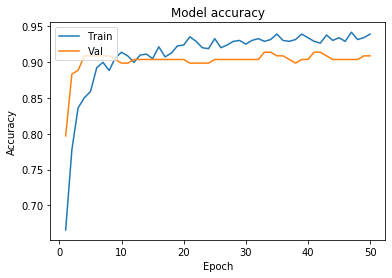

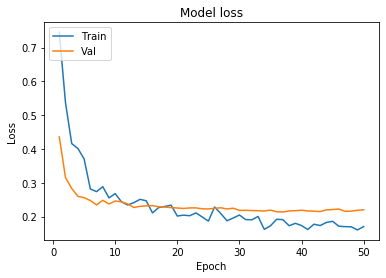

In [54]:
plot_learningCurve(history, 50)